In [1]:
import tensorflow as tf

### p.169 Perceptron 를 텐서플로로 표현하기

In [2]:
X_data = [[0, 0],[0, 1],[1, 0],[1, 1]]

X = tf.placeholder(tf.float32, [None,2])

W = tf.Variable([[2.],[4.]], name="weight")
b = tf.Variable([1.], name = "bias")

hypothesis = tf.matmul(X, W) + b

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(W))
    print(sess.run(hypothesis, feed_dict={X:X_data}))

[[2.]
 [4.]]
[[1.]
 [5.]
 [3.]
 [7.]]


### p.172 Perceptron의 학습

In [3]:
X_data = [[1, 1]]
Y_data = [[1]]

X = tf.placeholder(tf.float32, [None,2])
Y = tf.placeholder(tf.float32, [None,1])

W = tf.Variable([[2.],[4.]], name="weight")
b = tf.Variable([1.], name = "bias")

hypothesis = tf.matmul(X, W) + b
cost = tf.square(hypothesis - Y)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(7):
        W_val, b_val, cost_val = sess.run([W, b, cost], 
                                      feed_dict={X:X_data, Y:Y_data})
        sess.run(train, feed_dict={X:X_data, Y:Y_data})
        print("W:", W_val.reshape(1,2), "b:", b_val, "cost:", cost_val)

W: [[2. 4.]] b: [1.] cost: [[36.]]
W: [[0.79999995 2.8       ]] b: [-0.20000005] cost: [[5.7599993]]
W: [[0.31999996 2.32      ]] b: [-0.68000007] cost: [[0.9215996]]
W: [[0.128 2.128]] b: [-0.87200004] cost: [[0.14745605]]
W: [[0.05119999 2.0512    ]] b: [-0.9488] cost: [[0.02359288]]
W: [[0.02048005 2.02048   ]] b: [-0.97951996] cost: [[0.00377489]]
W: [[0.00819202 2.0081918 ]] b: [-0.991808] cost: [[0.00060398]]


### p.175 AND 게이트 구현

In [4]:
X_data = [[0, 0],[0, 1],[1, 0],[1, 1]]
Y_data = [[0],[0],[0],[1]]

X = tf.placeholder(tf.float32, [None,2])
Y = tf.placeholder(tf.float32, [None,1])

W = tf.Variable([[2.],[4.]], name="weight")
b = tf.Variable([1.], name = "bias")

hypothesis = tf.matmul(X, W) + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(1000):
        sess.run(train, feed_dict={X:X_data, Y:Y_data})
    W_val, b_val, cost_val, hyp_val, pre_val = sess.run(
        [W, b, cost, hypothesis, predicted], feed_dict={X:X_data, Y:Y_data})                                               
    print("W:", W_val.reshape(1,2), "b:", b_val, "cost:", cost_val,
          "\n hypothesis:\n", hyp_val, '\n predicted:\n', pre_val)

W: [[0.5000007 0.5000007]] b: [-0.25000077] cost: 0.0625 
 hypothesis:
 [[-0.25000077]
 [ 0.24999994]
 [ 0.24999994]
 [ 0.75000066]] 
 predicted:
 [[0.]
 [0.]
 [0.]
 [1.]]


### p.180 시그모이드 활용

In [5]:
X_data = [[0, 0],[0, 1],[1, 0],[1, 1]]
Y_data = [[0],[0],[0],[1]]

X = tf.placeholder(tf.float32, [None,2])
Y = tf.placeholder(tf.float32, [None,1])

W = tf.Variable([[2.],[4.]], name="weight")
b = tf.Variable([1.], name = "bias")

hypothesis = tf.sigmoid(tf.matmul(X, W) + b)
cost_Detail = -Y * tf.log(hypothesis) -(1 - Y) * tf.log(1 - hypothesis)
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(1000):
        sess.run(train, feed_dict={X:X_data, Y:Y_data})
    W_val, b_val, cost_val, cost_Detail_val, hyp_val, pre_val = sess.run(
        [W, b, cost, cost_Detail, hypothesis, predicted], feed_dict={X:X_data, Y:Y_data})                                               
    print("W:", W_val.reshape(1,2), "b:", b_val, "cost:", cost_val, "\n cost_detail:\n", cost_Detail_val,
          "\n hypothesis:\n", hyp_val, '\n predicted:\n', pre_val)

W: [[3.3827615 3.4324124]] b: [-5.3185835] cost: 0.12072968 
 cost_detail:
 [[0.0048877 ]
 [0.1411969 ]
 [0.13479799]
 [0.20203611]] 
 hypothesis:
 [[0.0048758 ]
 [0.13168165]
 [0.12610757]
 [0.8170654 ]] 
 predicted:
 [[0.]
 [0.]
 [0.]
 [1.]]


### p.182 시그모이드 & MSE

In [6]:
X_data = [[0, 0],[0, 1],[1, 0],[1, 1]]
Y_data = [[0],[0],[0],[1]]

X = tf.placeholder(tf.float32, [None,2])
Y = tf.placeholder(tf.float32, [None,1])

W = tf.Variable([[2.],[4.]], name="weight")
b = tf.Variable([1.], name = "bias")

hypothesis = tf.sigmoid(tf.matmul(X, W) + b)
cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(1000):
        sess.run(train, feed_dict={X:X_data, Y:Y_data})
    W_val, b_val, cost_val, hyp_val, pre_val = sess.run(
        [W, b, cost, hypothesis, predicted], feed_dict={X:X_data, Y:Y_data})                                               
    print("W:", W_val.reshape(1,2), "b:", b_val, "cost:", cost_val,
          "\n hypothesis:\n", hyp_val, '\n predicted:\n', pre_val)

W: [[2.1486247 2.5496874]] b: [-3.6718142] cost: 0.040638063 
 hypothesis:
 [[0.02479963]
 [0.24561699]
 [0.17899232]
 [0.73623633]] 
 predicted:
 [[0.]
 [0.]
 [0.]
 [1.]]


### p.183 시그모이드 미분그래프

In [7]:
import numpy as np
import matplotlib.pyplot as plt

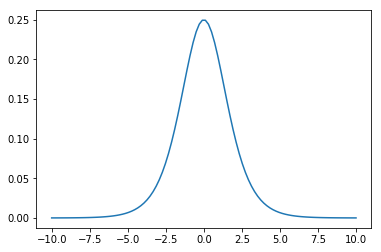

In [8]:
def sigmoid(x):
    return 1/(1+np.exp(-1*x))
def deff_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

x_data = np.linspace(-10, 10, 100)
y_data = deff_sigmoid(x_data)

plt.plot(x_data, y_data)
plt.show()

### p.235 Softmax Classification

In [9]:
tf.set_random_seed(777)

x_data = [[1, 2, 1, 1],
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],
          [1, 7, 5, 5],
          [1, 2, 5, 6],
          [1, 6, 6, 6],
          [1, 7, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

X = tf.placeholder("float", [None, 4])
Y = tf.placeholder("float", [None, 3])
nb_classes = 3

W = tf.Variable(tf.random_normal([4, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(2001):
        sess.run(optimizer, feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}))
            
    print('--------------')
    a = sess.run(hypothesis, feed_dict={X: [[1, 2, 1, 1]]})
    print(a, sess.run(tf.argmax(a, 1)))
    b = sess.run(hypothesis, feed_dict={X: [[2, 1, 3, 2]]})
    print(b, sess.run(tf.argmax(b, 1)))
    c = sess.run(hypothesis, feed_dict={X: [[3, 1, 3, 4]]})
    print(c, sess.run(tf.argmax(c, 1)))
    print('--------------')
    
    all = sess.run(hypothesis, feed_dict={
                   X: [[1, 2, 1, 1], [2, 1, 3, 2], [3, 1, 3, 4]]})
    
    print(all, sess.run(tf.argmax(all, 1)))

0 8.234596
200 0.6109049
400 0.501715
600 0.4057542
800 0.31276512
1000 0.2428631
1200 0.21935341
1400 0.19997402
1600 0.18363053
1800 0.16966866
2000 0.15761118
--------------
[[2.326574e-06 8.208166e-04 9.991768e-01]] [2]
[[0.00201385 0.08471417 0.913272  ]] [2]
[[9.0210442e-08 1.6583623e-01 8.3416361e-01]] [2]
--------------
[[2.3265741e-06 8.2081661e-04 9.9917680e-01]
 [2.0138491e-03 8.4714204e-02 9.1327190e-01]
 [9.0210442e-08 1.6583627e-01 8.3416361e-01]] [2 2 2]


### p.348 Learning Neural Network

In [10]:
X_data = [[1, 2]]
Y_data = [[1, 0]]

X = tf.placeholder(tf.float32, [None,2])
Y = tf.placeholder(tf.float32, [None,2])

W = tf.Variable([[1., 2.],[3., 4.]], name="weight")
b = tf.Variable([1., 2.], name = "bias")
                
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10):
        W_val, b_val, cost_val, hyp_val = sess.run(
            [W, b, cost, hypothesis], feed_dict={X:X_data, Y:Y_data})
        pred = sess.run(tf.argmax(hyp_val, 1))
        print('step :', step+1, '\nW:\n', np.round(W_val, 4), '\nb:', np.round(b_val, 4), '\ncost:', cost_val,
              '\nhypothesis:\n', np.round(hyp_val, 4),
              '\npredicted:\n', pred)
        print('-'*20)
        sess.run(train, feed_dict={X:X_data, Y:Y_data})

step : 1 
W:
 [[1. 2.]
 [3. 4.]] 
b: [1. 2.] 
cost: 4.01815 
hypothesis:
 [[0.018 0.982]] 
predicted:
 [1]
--------------------
step : 2 
W:
 [[1.0982 1.9018]
 [3.1964 3.8036]] 
b: [1.0982 1.9018] 
cost: 2.879391 
hypothesis:
 [[0.0562 0.9438]] 
predicted:
 [1]
--------------------
step : 3 
W:
 [[1.1926 1.8074]
 [3.3852 3.6148]] 
b: [1.1926 1.8074] 
cost: 1.8584802 
hypothesis:
 [[0.1559 0.8441]] 
predicted:
 [1]
--------------------
step : 4 
W:
 [[1.277 1.723]
 [3.554 3.446]] 
b: [1.277 1.723] 
cost: 1.0872645 
hypothesis:
 [[0.3371 0.6629]] 
predicted:
 [1]
--------------------
step : 5 
W:
 [[1.3433 1.6567]
 [3.6866 3.3134]] 
b: [1.3433 1.6567] 
cost: 0.63524795 
hypothesis:
 [[0.5298 0.4702]] 
predicted:
 [0]
--------------------
step : 6 
W:
 [[1.3903 1.6097]
 [3.7806 3.2194]] 
b: [1.3903 1.6097] 
cost: 0.40865976 
hypothesis:
 [[0.6645 0.3355]] 
predicted:
 [0]
--------------------
step : 7 
W:
 [[1.4238 1.5762]
 [3.8477 3.1523]] 
b: [1.4238 1.5762] 
cost: 0.29081345 
hypothesi

### p.370 Batch, Andgate

In [11]:
X_data = [[0, 0],[0, 1],[1, 0],[1, 1]]
Y_data = [[1, 0],[1, 0],[1, 0],[0, 1]]

X = tf.placeholder(tf.float32, [None,2])
Y = tf.placeholder(tf.float32, [None,2])

nb_classes = 2
W = tf.Variable([[1., 2.],[3., 4.]], name="weight")
b = tf.Variable([[1., 2.]], name = "bias")
                
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
logit = tf.matmul(X, W) + b
cost = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=Y)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1)
train = optimizer.minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(5):
        W_val, b_val, hyp_val = sess.run([W, b, hypothesis], 
                                         feed_dict={X:X_data, Y:Y_data})
        print('step : ', step,
              '\nW :\n', np.round(W_val, 2), '\nb:\n', np.round(b_val, 2),
              '\n hypothesis:\n', np.round(hyp_val, 2), '\n', '-'*20)
        sess.run(train, feed_dict={X:X_data, Y:Y_data})

step :  0 
W :
 [[1. 2.]
 [3. 4.]] 
b:
 [[1. 2.]] 
 hypothesis:
 [[0.27 0.73]
 [0.12 0.88]
 [0.12 0.88]
 [0.05 0.95]] 
 --------------------
step :  1 
W :
 [[1.83 1.17]
 [3.83 3.17]] 
b:
 [[ 3.45 -0.45]] 
 hypothesis:
 [[0.98 0.02]
 [0.99 0.01]
 [0.99 0.01]
 [0.99 0.01]] 
 --------------------
step :  2 
W :
 [[0.85 2.15]
 [2.85 4.15]] 
b:
 [[2.49 0.51]] 
 hypothesis:
 [[0.88 0.12]
 [0.66 0.34]
 [0.66 0.34]
 [0.35 0.65]] 
 --------------------
step :  3 
W :
 [[0.84 2.16]
 [2.84 4.16]] 
b:
 [[2.93 0.07]] 
 hypothesis:
 [[0.95 0.05]
 [0.82 0.18]
 [0.82 0.18]
 [0.55 0.45]] 
 --------------------
step :  4 
W :
 [[0.46 2.54]
 [2.46 4.54]] 
b:
 [[2.79 0.21]] 
 hypothesis:
 [[0.93 0.07]
 [0.62 0.38]
 [0.62 0.38]
 [0.17 0.83]] 
 --------------------
